<a href="https://colab.research.google.com/github/buimanhtien33/DeepLearning_Basics/blob/main/KNN/Kmeans_Clustering_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

Clustering Kmeans is Unsupervised-learning method

We don't know the label of each point data. However, we know the K number of cluster.

Input: data X and No.Clusters K

Output: center point M of each the cluter and label for each point data.

**Steps to take:**

1. Choose the number of clusters (K).
2. Initialize K centroids randomly in our data space
3. Assign each data point to the nearest centroids based on the Euclidean distance
4. Calculate the new centroid for each cluster as the mean of all the points in that cluster.
5. Repeat step 3 and 4 until the centroids stop changing significantly or the max number of iterations.
6. Return centroids of each the cluter and label for each point data


# Toy example
Chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# scipy.spatial.distance để tính khoảng cách 
#giữa các cặp điểm trong hai tập hợp

Chúng ta cần một hàm kmeans_display để hiển thị dữ liệu. 

Sau đó hiển thị dữ liệu theo nhãn ban đầu.

In [26]:
def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]

  plt.plot(X0[:,0], X0[:,1],'b^', markersize=4, alpha=0.8)
  plt.plot(X1[:,0], X1[:,1],'go', markersize=4, alpha=0.8)
  plt.plot(X2[:,0], X2[:,1],'rs', markersize=4, alpha=0.8)

  plt.axis('equal')
  plt.plot()
  plt.show


Tiếp theo, ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. 

Mỗi cluster có 500 điểm. 

(Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu.)

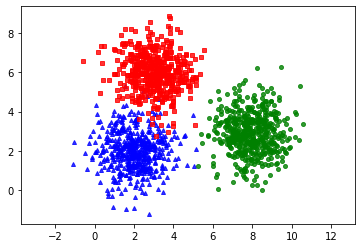

In [27]:
means = [[2,2], [8,3], [3,6]]
cov = [[1, 0],[0, 1]]
N = 500
K = 3

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2),axis=0)

original_label = np.asarray([0]*N + [1]*N + [2]*N)# Creat an array has 500 points label 0, 500 - label1, 500-label2 

kmeans_display(X,original_label)


### Some important functions for K-means clustering 
1. **kmeans_init_centers** để khởi tạo các centers ban đầu.
2. **kmeans_asign_labels** để gán nhán mới cho các điểm khi biết các centers.
3. **kmeans_update_centers** để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
5. **has_converged** để kiểm tra điều kiện dừng của thuật toán.

In [28]:
def kmeans_init_centers(X, K):
  # Randomly pick k rows of X as initial centers
  return X[np.random.choice(X.shape[0], K, replace =False)]

def kmeans_assign_labels(X, centers):
  # calculate pairwise distance btw data and centers
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    # Collect all points asigned to teh k-th cluster
    Xk = X[labels == k, :]
    # Take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

def has_converged(centers, new_centers):
  # return TRUE if two sets of centers are the same
  return (set([tuple(a) for a in centers])) == set([tuple(a) for a in new_centers])




Main function of K-means ClusteringClustering

In [29]:
def kmeans(X, K):
  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X,labels[-1],K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)



Apply the above  algorithm and display the results

Centers found by our  algorithm
[[3.00266234 6.02445174]
 [7.90929772 2.90871429]
 [2.01362092 1.99013572]]


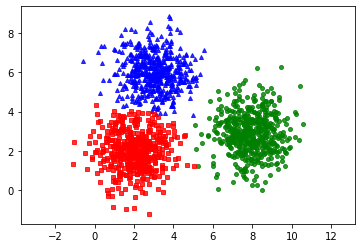

In [30]:
(centers, labels, it) = kmeans(X,K)
print('Centers found by our  algorithm')
print(centers[-1])

kmeans_display(X, labels[-1])

## In addition, we can use scikit-learn library for K-means cluster

In [31]:
from sklearn.cluster import KMeans

centers found by scikit-learn:
[[3.00266234 6.02445174]
 [7.90929772 2.90871429]
 [2.01362092 1.99013572]]


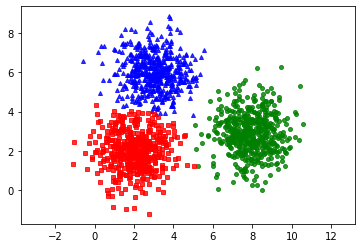

In [32]:
kmeans = KMeans(n_clusters=3).fit(X)
print('centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.labels_
kmeans_display(X, pred_label)